# Setup environment

In [1]:
import numpy as np
from numpy.linalg import inv
import math

import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [2]:
def generate_clusters(centers, distance, plot_classes=False, seed=123):
  %matplotlib inline
  np.random.seed(seed=seed)

  fig = plt.figure(figsize=(10,7))
  
  for i, center in enumerate(centers):
    dim_aux = len(center)
    if i == 0:
      dim = len(center)
  
    if dim_aux < 2 or dim_aux > 3:
      print("The dimensions must be between 2 and 3")
      return 0
    elif (dim_aux == 2 or dim_aux == 3) and dim_aux == dim:
      continue
    else:
      print("All the centers must contain the same number of coordinates")
      return 0

  if dim == 3:
    ax = fig.add_subplot(projection='3d')

  X = np.array([])
  Y = np.array([])
  Z = np.array([])

  for center in centers:

    if len(center) == 2:
      x = np.random.normal(center[0], distance, size=(200,))
      y = np.random.normal(center[1], distance, size=(200,)) 

      if plot_classes:
        plt.scatter(x, y)

      X = np.concatenate((X, x))
      Y = np.concatenate((Y, y))
    
    elif len(center) == 3:

      x = np.random.normal(center[0], distance, size=(200,))
      y = np.random.normal(center[1], distance, size=(200,)) 
      z = np.random.normal(center[2], distance, size=(200,))

      if plot_classes:
        ax.scatter(x, y, z)

      X = np.concatenate((X, x))
      Y = np.concatenate((Y, y))
      Z = np.concatenate((Z, z))

  if not plot_classes:
    if dim == 2:
      plt.scatter(X, Y)
      plt.title("2D plot of data pints")
  
    else:
      ax.scatter(X, Y, Z)
      # axis: 'x', 'y' y 'z'
      ax.set_xlabel('X', fontsize=10, rotation=155)
      ax.set_ylabel('Y', fontsize=10, rotation=5)
      ax.set_zlabel('Z', fontsize=10, rotation=87)
      plt.title("3D plot of data pints")
  
  if dim == 2:
    X = np.stack([X,Y]).T
  else:
    X = np.stack([X,Y,Z]).T
  
  plt.show()

  print(f'Out file of shape {X.shape}')
  return X


#### 2D example:

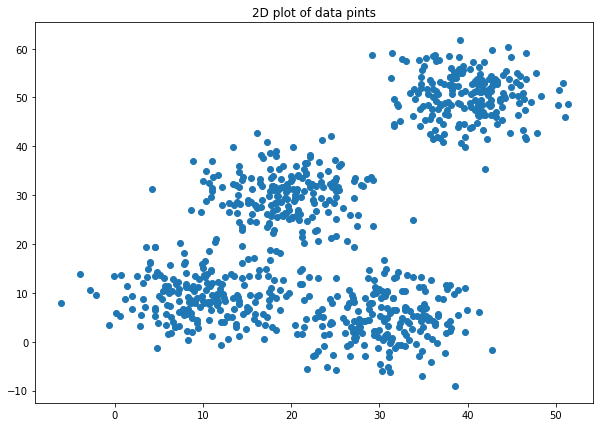

Out file of shape (800, 2)


In [3]:
# 2D:
centers = [(10, 10), (30, 5), (20, 30), (40, 50)]
distance = 5

# Original data:
X = generate_clusters(centers, distance)

In [4]:
# Objective
X = generate_clusters(centers, distance, plot_classes=True)

Out file of shape (800, 2)


#### 3D example:

In [5]:
# 3D:
centers = [(10, 10, 10), (30, 5, 10), (20, 30, 20), (40, 50, 5)]
distance = 5

# Original data:
X = generate_clusters(centers, distance)

Out file of shape (800, 3)


In [6]:
# Objective
X = generate_clusters(centers, distance, plot_classes=True)

Out file of shape (800, 3)


# Models


### k-Means

With k-means we generate n clusters of data, by calculating the means of the datapoints and finding the centroids using the means of the rounding datapoints.

to do that we generate random centroids, and then calculate the mean to re-define the centroids:

#### 1. Generate random centroids


In [7]:
K = 4

In [8]:
# Generate random centroids:

def generate_centroids(k, X):
    centroids = []
    for i in range(k):
      centroid = []
      for j in range(X.shape[1]):
        s = float(np.random.uniform(X[:,j].min(), X[:,j].max(), 1))
        centroid.append(s)
      # print(center)
      centroids.append(centroid)
    # print(centers)
    return np.array(centroids)

centroids = generate_centroids(k=K, X=X)
centroids.shape

(4, 3)

In [9]:
def plot_centraids(centroids, X):
  fig = plt.figure(figsize=(10,7))
  ax = fig.add_subplot(projection='3d')
  ax.scatter(X[:, 0], X[:, 1], X[:, 2])

  ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='Red', s=80, marker='o')

  # axis: 'x', 'y' y 'z'
  ax.set_xlabel('X', fontsize=13)
  ax.set_ylabel('Y', fontsize=13)
  ax.set_zlabel('Z', fontsize=13)
  plt.title("3D plot of data pints and centroids")

plot_centraids(centroids, X)


#### 2. Calcuate the euclidean distance of each point to each centroid:

* Euclidean Distance:

$$
d\left( x_i,x_j\right)   = \sqrt {\sum _{k=0}^{n}  \left( f_{i(k)}-f_{j(k)}\right)^2 } 
$$

In [10]:
def euclidean_distance(xi, xj):
  return np.sqrt(np.sum((xi - xj)**2, axis=1)) 

In [11]:
def get_distances(centroids, X):
  distances = []
  for i, centroid in enumerate(centroids):
    distances.append(euclidean_distance(centroid, X))

  distances = np.array(distances).T
  return distances

distances = get_distances(centroids, X)
distances.shape

(800, 4)

#### 3. Asign clusters

In [12]:
# Index of closest value
clusters = np.argmin(distances, axis=1)
clusters.shape

(800,)

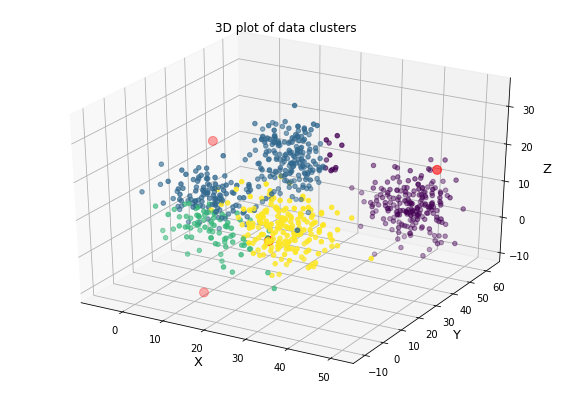

In [13]:
def plot_clusters(centroids, X, classes):
  fig = plt.figure(figsize=(10,7))
  ax = fig.add_subplot(projection='3d')
  ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=classes)

  ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='Red', s=80, marker='o')

  # axis: 'x', 'y' y 'z'
  ax.set_xlabel('X', fontsize=13)
  ax.set_ylabel('Y', fontsize=13)
  ax.set_zlabel('Z', fontsize=13)
  plt.title("3D plot of data clusters")

plot_clusters(centroids, X, clusters)

#### 4. Recalculate the centroids using the mean of the classes generated 

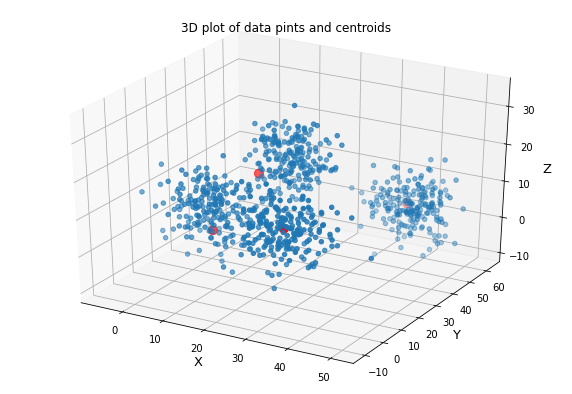

In [14]:
# update the centroids
def update_centroids(K, clusters):
  new_centroids = []
  for i in range(K):
      new_centroids.append(X[clusters == i].mean(axis=0))
  return np.array(new_centroids)

centroids = update_centroids(K, clusters)
centroids.shape
plot_centraids(centroids, X)

#### 5. Repeat the process again

In [15]:
# Calculate the distances:
distances = get_distances(centroids, X)
# Get the closest mean:
clusters = np.argmin(distances, axis=1)
plot_clusters(centroids, X, clusters)

# Update centroids
centroids = update_centroids(K, clusters)

#### Integration

In [16]:
class Kmeans:
  def __init__(self, K=3, plot=False, iterations=20):
    self.K = K
    self.plot = plot
    self.iterations = iterations

  def predict(self, X):
    # Generate centroids:
    centroids = self.generate_centroids(X)
    clusters_ref = np.random.randint(0, self.K, X.shape[0])

    # Create loop
    for i in range(self.iterations):
      # Plot centroids:
      if self.plot:
        self.plot_centraids(centroids, X, i)

      # Calculate the distances    
      distances = self.get_distances(centroids, X)
      # Get the closest mean (class):
      clusters = np.argmin(distances, axis=1)

      # Plot Clusters:
      if self.plot:
        self.plot_clusters(centroids, X, clusters, i)

      # Update centroids
      centroids = update_centroids(self.K, clusters)

      if all(clusters == clusters_ref):
        print(f'Means converged in iteration # {i}')
        break

      centroids_ref = clusters
      
    plt.show()
      
    return clusters
      

  def generate_centroids(self, X):
    centroids = []
    for i in range(self.K):
      centroid = []
      for j in range(X.shape[1]):
        s = float(np.random.uniform(X[:,j].min(), X[:,j].max(), 1))
        centroid.append(s)
      # print(center)
      centroids.append(centroid)
    # print(centers)
    return np.array(centroids)

  def get_distances(self, centroids, X):
    distances = []
    for i, centroid in enumerate(centroids):
      distances.append(self.euclidean_distance(centroid, X))

    distances = np.array(distances).T
    return distances

  def plot_centraids(self, centroids, X, i):
    fig = plt.figure(figsize=(10,7))
    if X.shape[1] == 3:
      ax = fig.add_subplot(projection='3d')
      ax.scatter(X[:, 0], X[:, 1], X[:, 2])

      ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='Red', s=80, marker='o')

      # axis: 'x', 'y' y 'z'
      ax.set_xlabel('X', fontsize=13)
      ax.set_ylabel('Y', fontsize=13)
      ax.set_zlabel('Z', fontsize=13)
      plt.title(f"3D plot of data pints and centroids in iteration {i}")
    else:
      plt.scatter(X[:, 0], X[:, 1])

      plt.scatter(centroids[:, 0], centroids[:, 1], c='Red', s=80, marker='o')

      plt.title(f"2D plot of data pints and centroids in iteration {i}")

    plt.pause(0.05)

  def plot_clusters(self, centroids, X, classes, i):
    fig = plt.figure(figsize=(10,7))
    if X.shape[1] == 3:
      ax = fig.add_subplot(projection='3d')
      ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=classes)

      ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='Red', s=80, marker='o')

      # axis: 'x', 'y' y 'z'
      ax.set_xlabel('X', fontsize=13)
      ax.set_ylabel('Y', fontsize=13)
      ax.set_zlabel('Z', fontsize=13)
      plt.title(f"3D plot of data clusters in iteration {i}")
    else:
      plt.scatter(X[:, 0], X[:, 1], c=classes)
      plt.scatter(centroids[:, 0], centroids[:, 1], c='Red', s=80, marker='o')

      plt.title(f"2D plot of data clusters in iteration {i}")

    plt.pause(0.05)

  def euclidean_distance(self, xi, xj):
    return np.sqrt(np.sum((xi - xj)**2, axis=1)) 

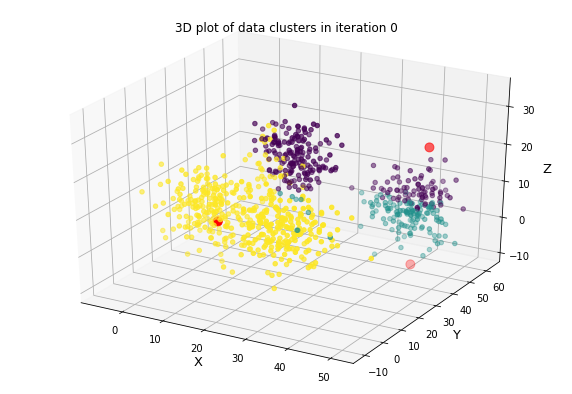

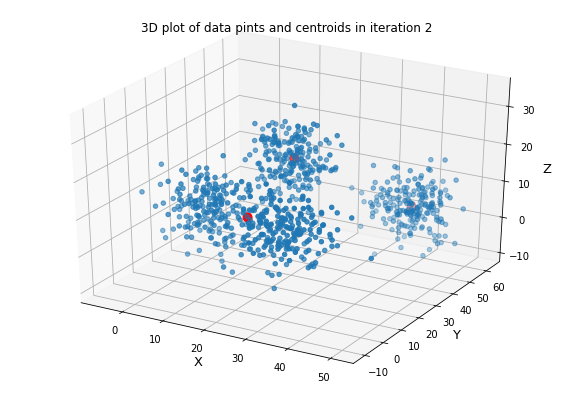

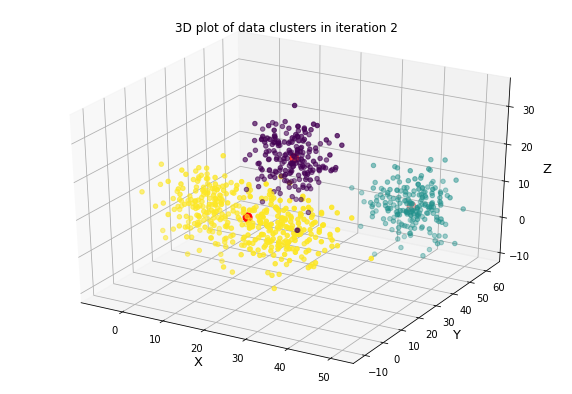

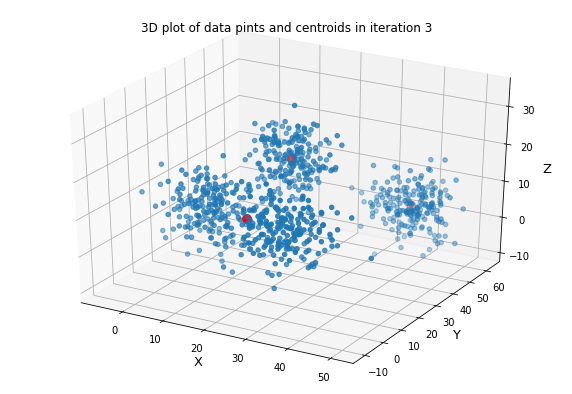

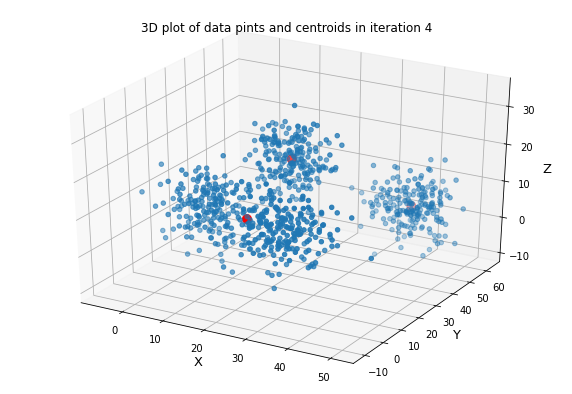

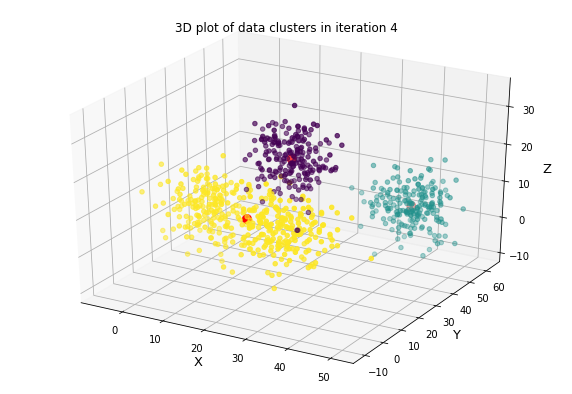

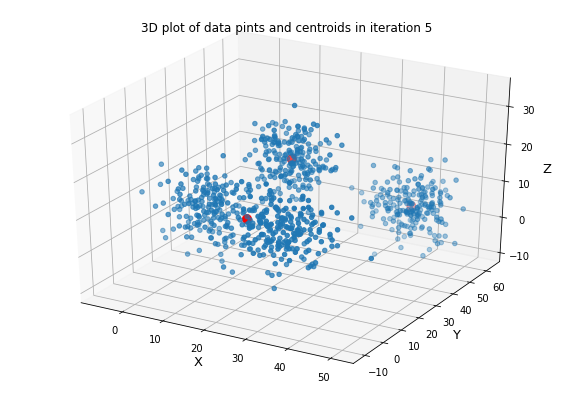

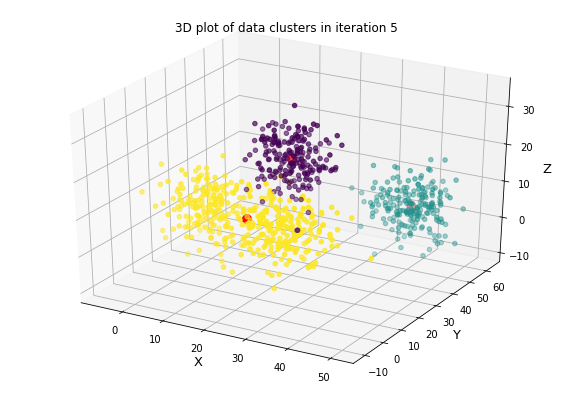

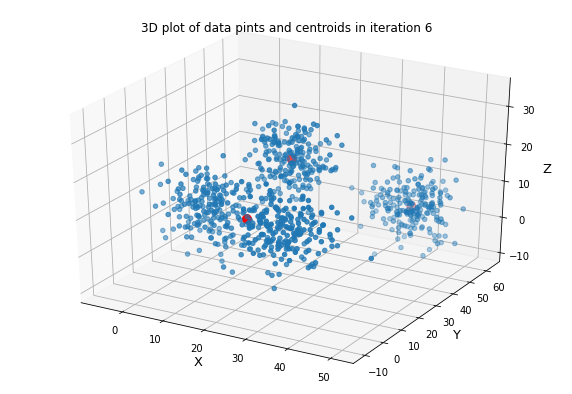

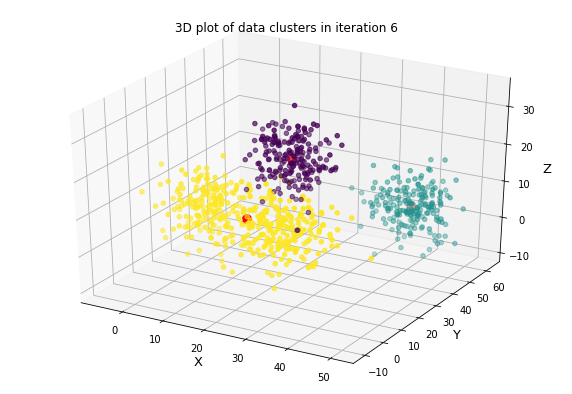

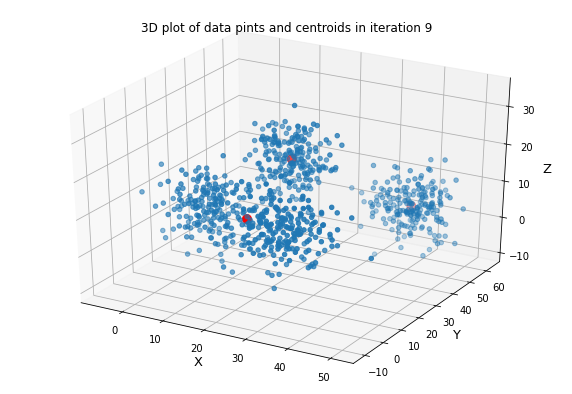

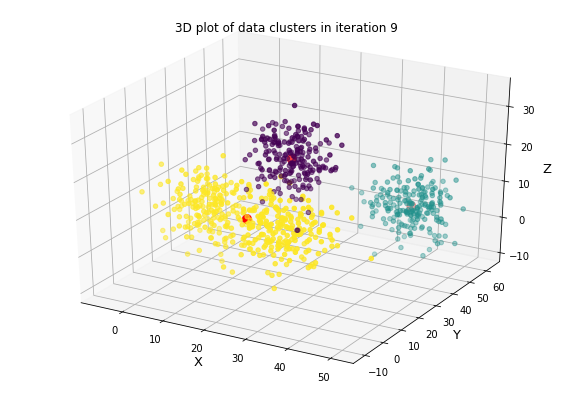

In [17]:
kmeans = Kmeans(K=3, plot=True, iterations=10)
cl_3k = kmeans.predict(X)

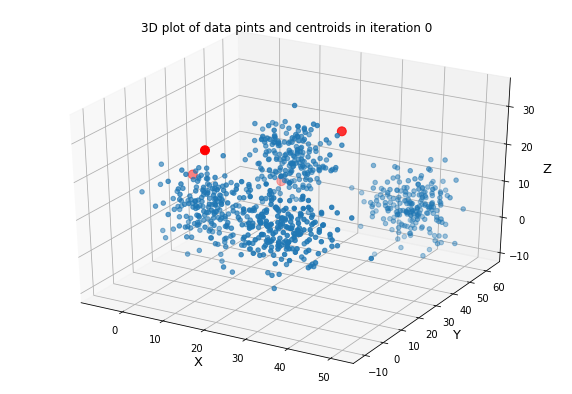

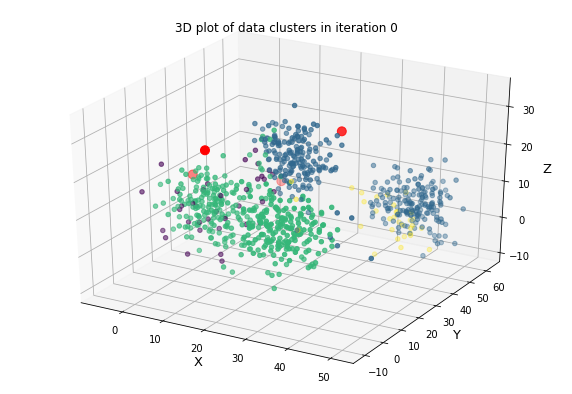

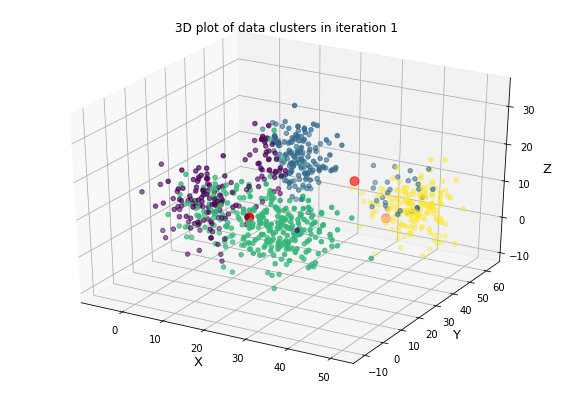

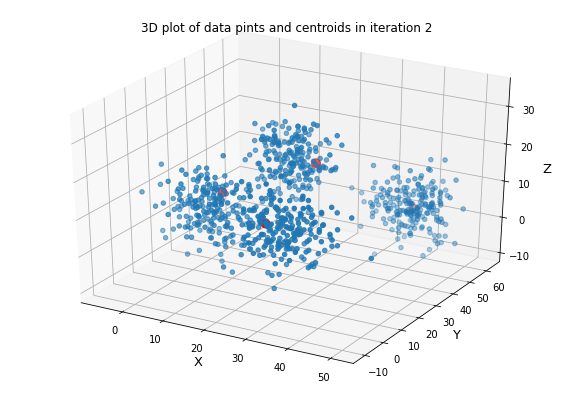

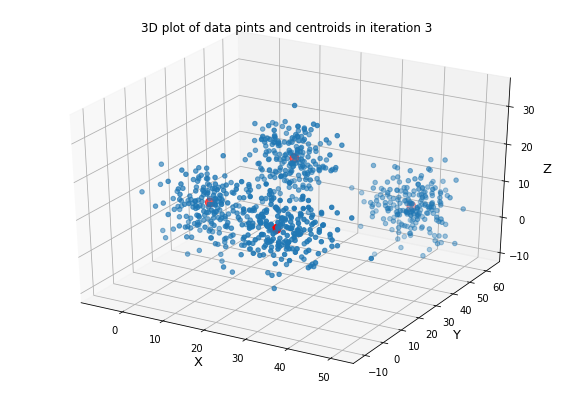

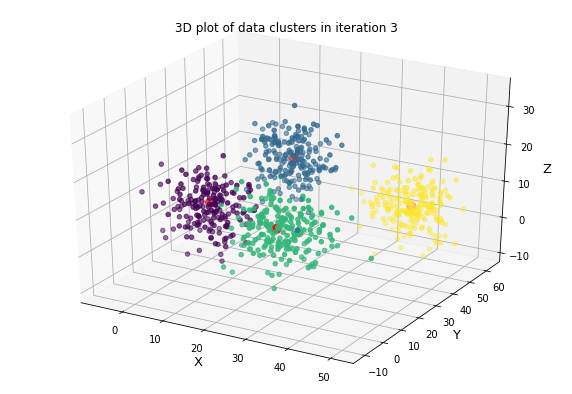

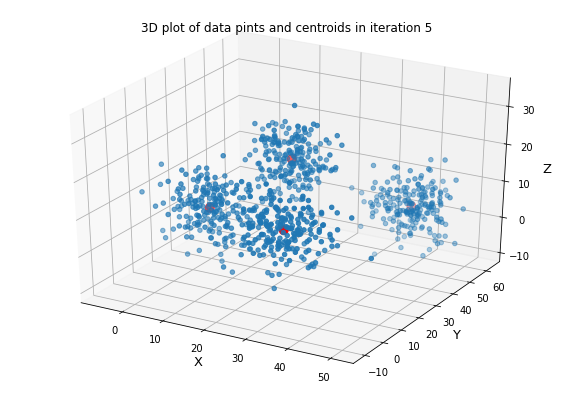

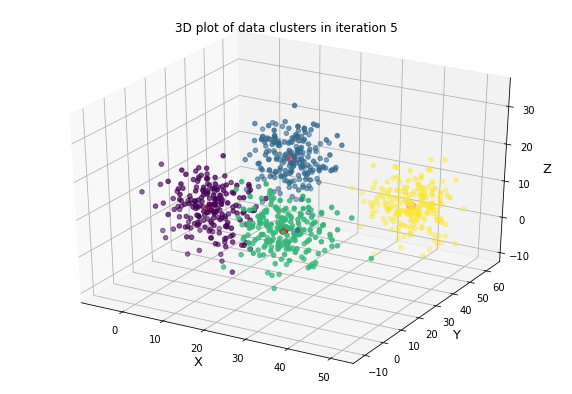

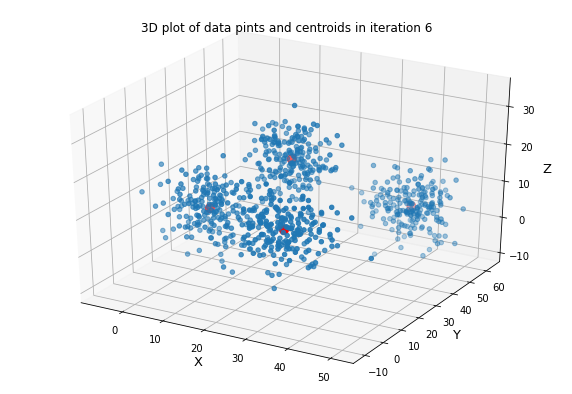

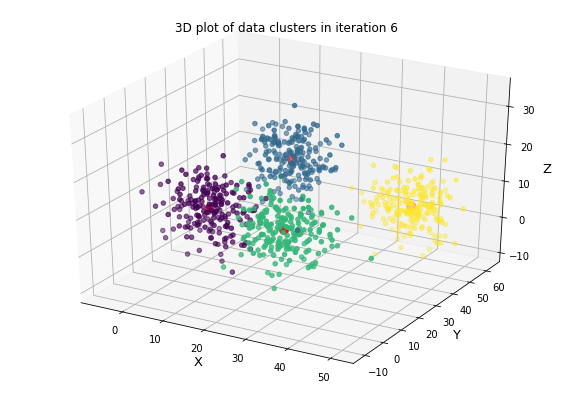

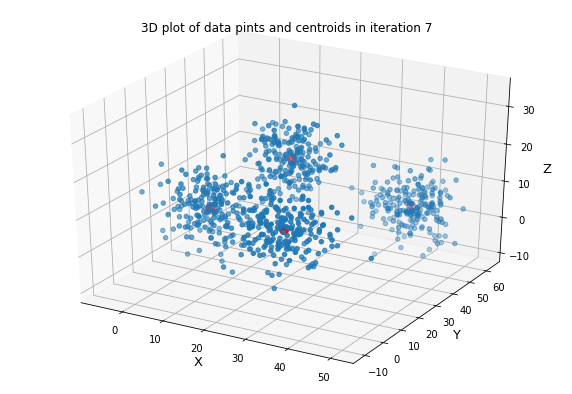

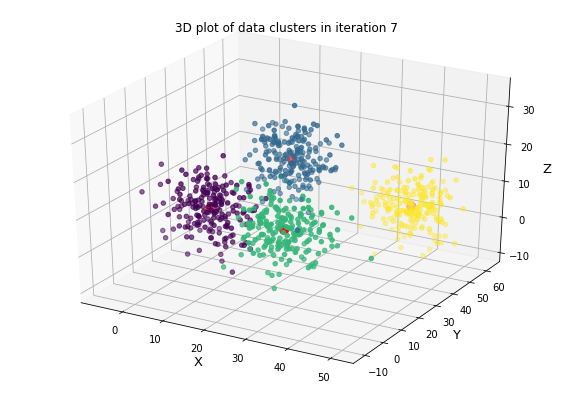

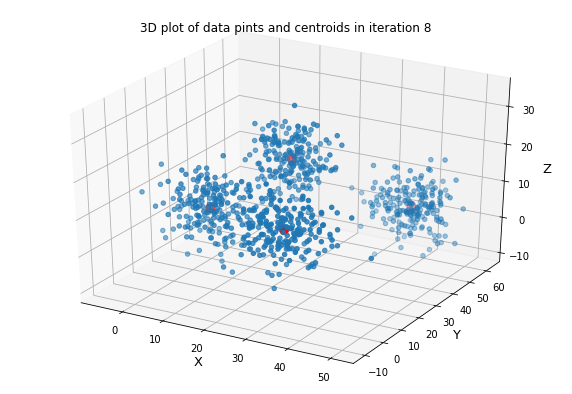

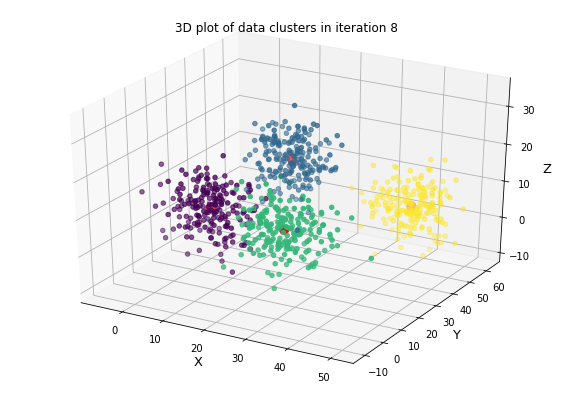

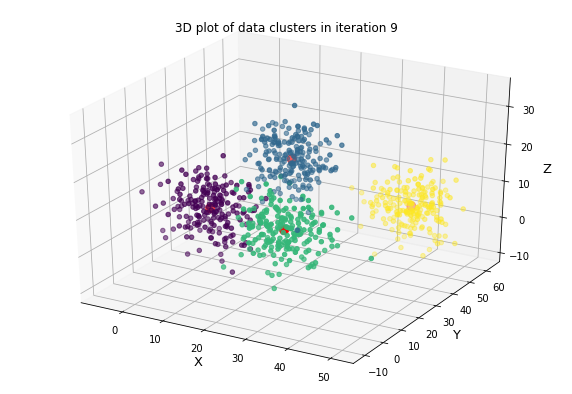

In [18]:
kmeans = Kmeans(K=4, plot=True, iterations=10)
cl_4k = kmeans.predict(X)

# 2D clustering:


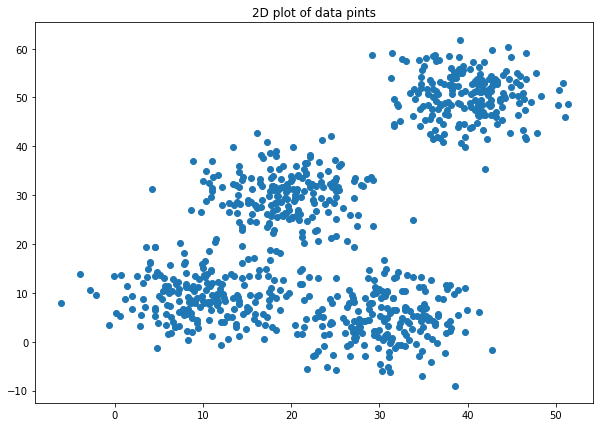

Out file of shape (800, 2)


In [19]:
### Generate dataset:
# 2D:
centers = [(10, 10), (30, 5), (20, 30), (40, 50)]
distance = 5

# Original data:
X = generate_clusters(centers, distance)

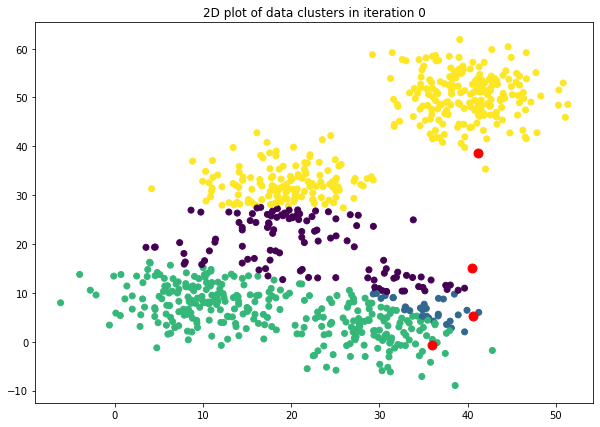

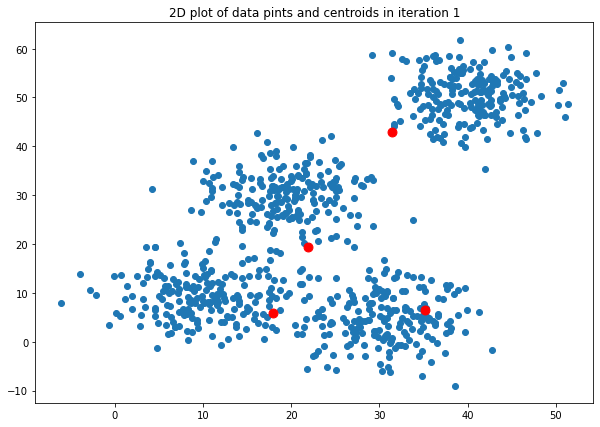

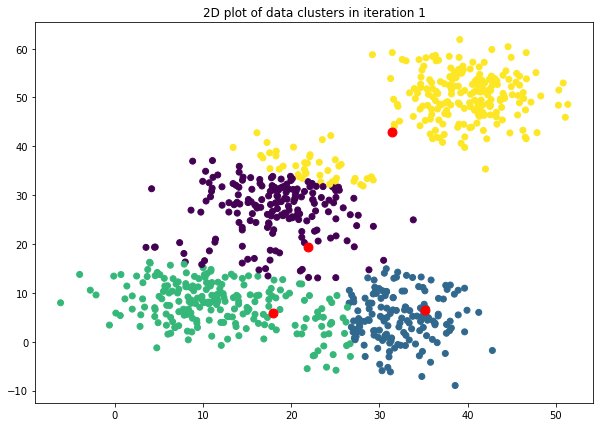

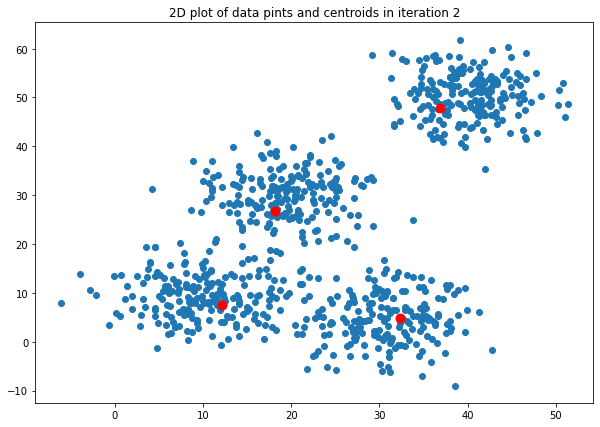

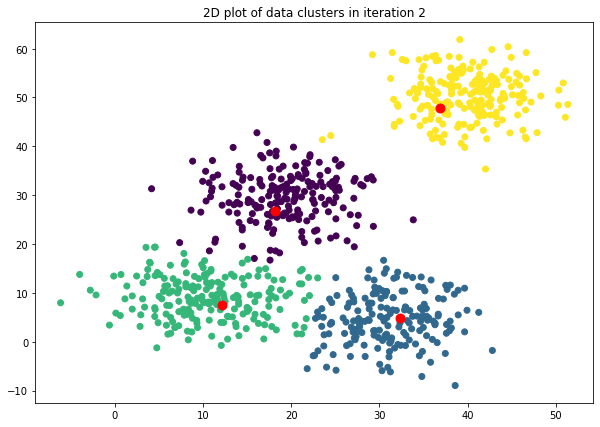

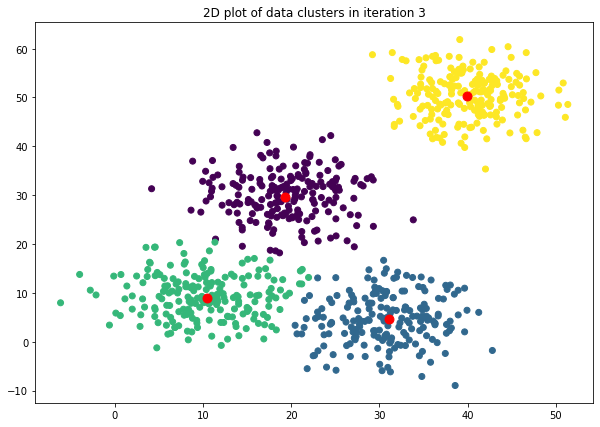

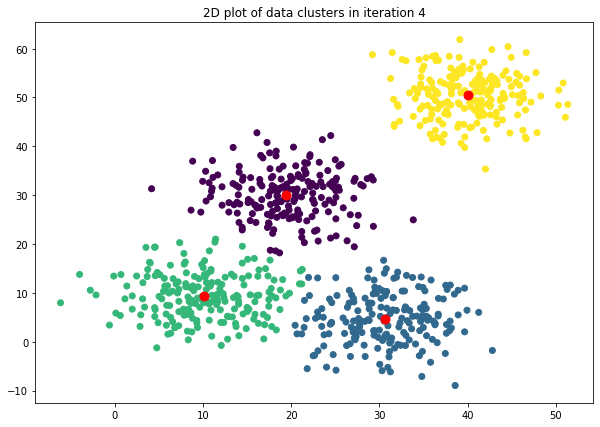

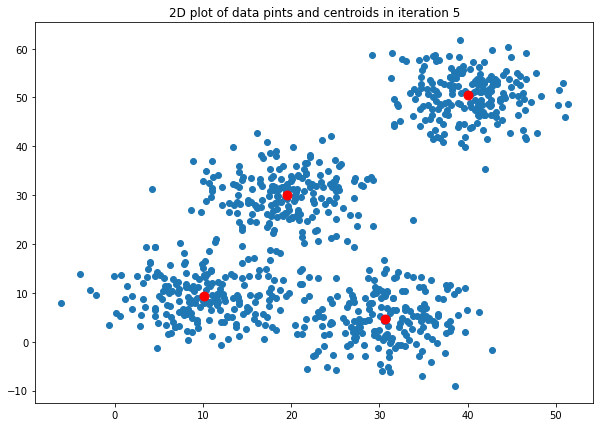

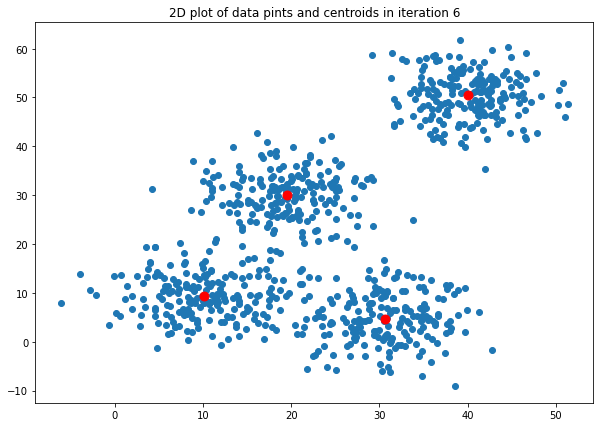

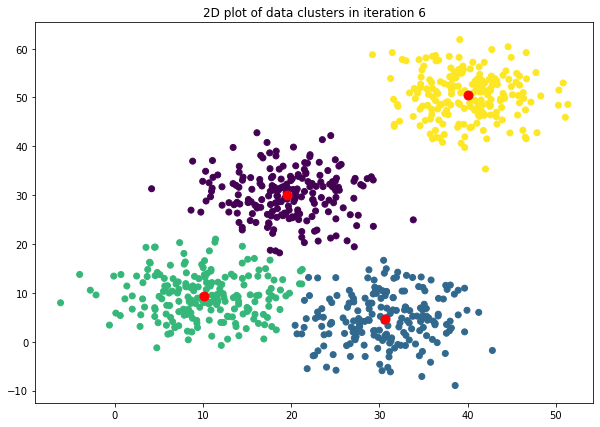

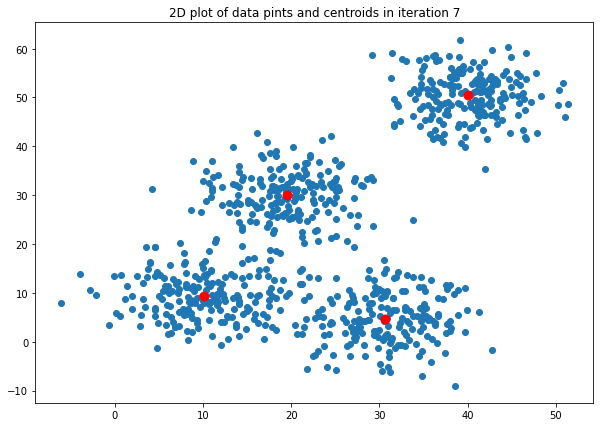

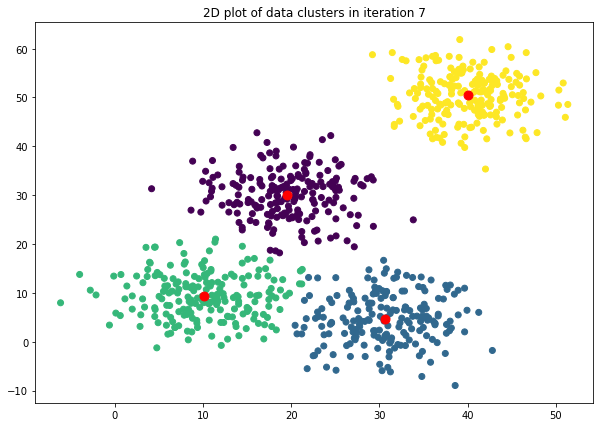

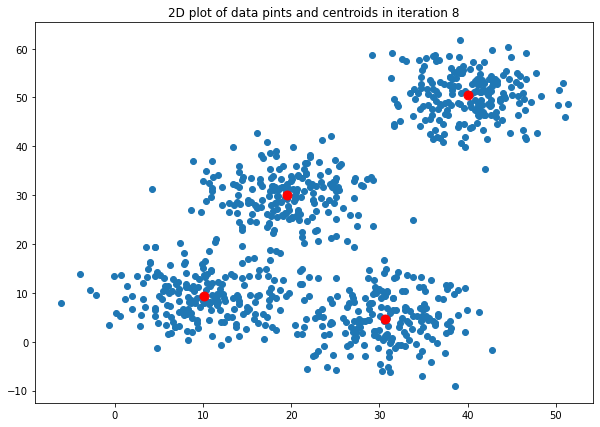

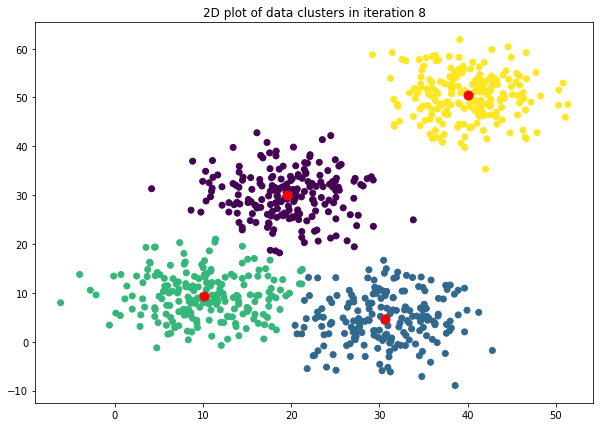

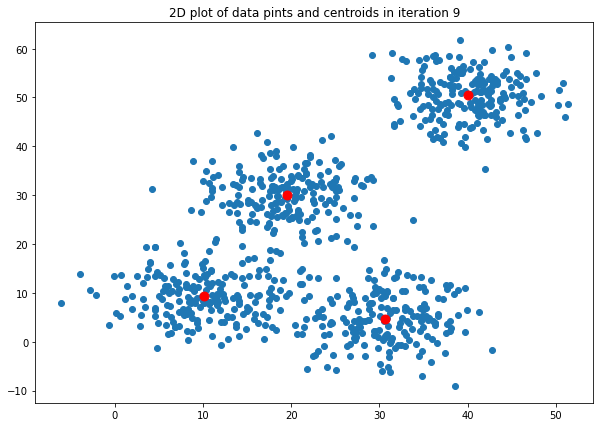

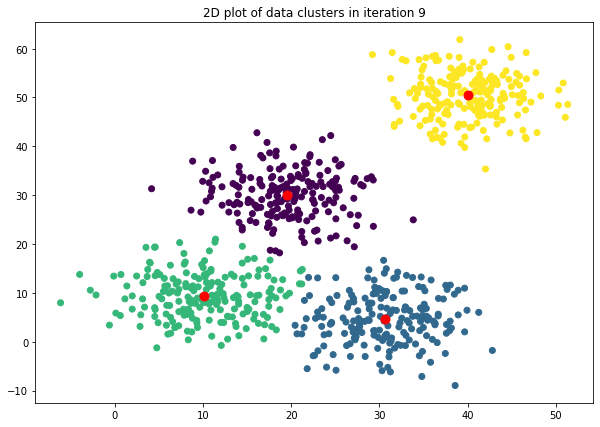

In [20]:
kmeans = Kmeans(K=4, plot=True, iterations=10)
cl_4k = kmeans.predict(X)